## SIT731 - Data Wrangling
#### Student ID: 220090063
#### Name: Truong Phuc Le (Daniel)

Download dataset: https://github.com/gagolews/teaching-data/tree/master/marek

    1. nhanes_adult_male_bmx_2020.csv,
    2. nhanes_adult_female_bmx_2020.csv.

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, stats, pearsonr, spearmanr
import seaborn as sns

Read data as *numpy* matrices named *male* and *female* using *numpy.genfromtxt*. Each matrix consist of 7 column

1. weight (kg),
2. standing height (cm),
3. upper arm length (cm),
4. upper leg length (cm),
5. arm circumference (cm),
6. hip circumference (cm),
7. waist circumference (cm).

In [117]:

# *Read male data from row 20-4100 = 4081 rows
male = np.genfromtxt('nhanes_adult_male_bmx_2020.csv', delimiter=',', skip_header=19, usecols=(0, 1, 2, 3, 4, 5, 6))
# *Read female data
female = np.genfromtxt('nhanes_adult_female_bmx_2020.csv', delimiter=',', skip_header=19, usecols=(0, 1, 2, 3, 4, 5, 6))

print("Male Data:\n", male)
print("\nFemale Data: \n", female)

#! ''' Just for testing '''
num_rows_female = len(female)
num_rows_male = len(male)
start_row_female = 20
end_row_female = start_row_female + num_rows_female - 1
start_row_male = 20
end_row_male = start_row_male + num_rows_male - 1

print("\nNumber of rows in male data:", num_rows_male)
print("Start row in male data:", start_row_male)
print("End row in male data:", end_row_male)
print("\nNumber of rows in female data:", num_rows_female)
print("Start row in female data:", start_row_female)
print("End row in female data:", end_row_female)

Male Data:
 [[ 98.8 182.3  42.  ...  38.2 108.2 120.4]
 [ 74.3 184.2  41.1 ...  30.2  94.5  86.8]
 [103.7 185.3  47.  ...  32.  107.8 109.6]
 ...
 [108.8 168.7  38.6 ...  33.6 118.  114.7]
 [ 79.5 176.4  39.5 ...  31.4  99.8  97.1]
 [ 59.7 167.5  40.3 ...  29.2  90.5  86.9]]

Female Data: 
 [[ 97.1 160.2  34.7 ...  35.8 126.1 117.9]
 [ 91.1 152.7  33.5 ...  38.5 125.5 103.1]
 [ 73.  161.2  37.4 ...  31.8 106.2  92. ]
 ...
 [ 73.  159.6  36.2 ...  31.4 104.6  99.3]
 [ 78.6 168.5  38.1 ...  36.  102.4  98.5]
 [ 82.8 147.8  34.8 ...  39.5 121.4 110. ]]

Number of rows in male data: 4081
Start row in male data: 20
End row in male data: 4100

Number of rows in female data: 4221
Start row in female data: 20
End row in female data: 4240


In both cases, add the eight column which stores the body mass indices of the participants

In [118]:

#* BMI = mass(kg)/height(m)^2 (1m = 100cm)
#* Calculate BMI for male data
male_bmi = male[:, 0] / (male[:, 1] / 100)**2
male = np.column_stack((male, male_bmi))

#* Calculate BMI for female data
female_bmi = female[:, 0] / (female[:, 1] / 100)**2
female = np.column_stack((female, female_bmi))

print("##Updated Male Data with column 8 is BMI:\n", male)
print("\n##Updated Female Data with column 8 is BMI: \n", female)


##Updated Male Data with column 8 is BMI:
 [[ 98.8        182.3         42.         ... 108.2        120.4
   29.72922633]
 [ 74.3        184.2         41.1        ...  94.5         86.8
   21.89825769]
 [103.7        185.3         47.         ... 107.8        109.6
   30.20145858]
 ...
 [108.8        168.7         38.6        ... 118.         114.7
   38.22950988]
 [ 79.5        176.4         39.5        ...  99.8         97.1
   25.54876826]
 [ 59.7        167.5         40.3        ...  90.5         86.9
   21.27868122]]

##Updated Female Data with column 8 is BMI: 
 [[ 97.1        160.2         34.7        ... 126.1        117.9
   37.83504078]
 [ 91.1        152.7         33.5        ... 125.5        103.1
   39.06972037]
 [ 73.         161.2         37.4        ... 106.2         92.
   28.09265496]
 ...
 [ 73.         159.6         36.2        ... 104.6         99.3
   28.65873958]
 [ 78.6        168.5         38.1        ... 102.4         98.5
   27.68361084]
 [ 82.8        147.8

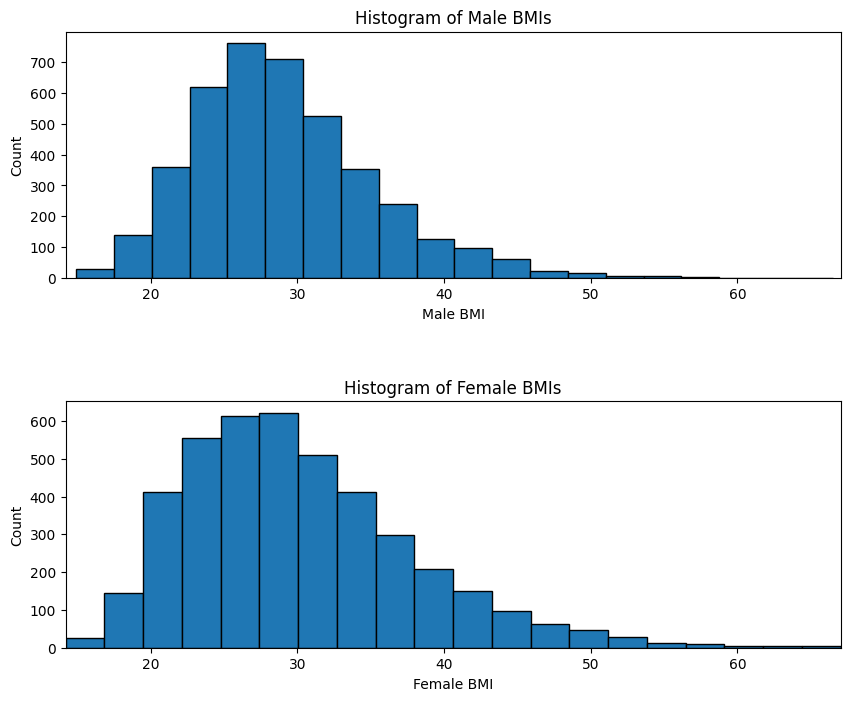

In [119]:
# Create a figure with two subplots, one above the other
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

bins = 20 #* /Data values into range of 20 intervals
# *Hist for Male ax1 at the top
ax1.hist(male[:, -1], bins=bins, edgecolor='black')
ax1.set_title('Histogram of Male BMIs')

# *Hist for Female ax2 at the bottom
ax2.hist(female[:, -1], bins=bins, edgecolor='black')
ax2.set_title('Histogram of Female BMIs')

# *Set the x-axis limits to be the same for both subplots
x_min = min(male[:, -1].min(), female[:, -1].min())
x_max = max(male[:, -1].max(), female[:, -1].max())
ax1.set_xlim(x_min, x_max)
ax2.set_xlim(x_min, x_max)

ax1.set_xlabel('Male BMI')
ax1.set_ylabel('Count')
ax2.set_xlabel('Female BMI')
ax2.set_ylabel('Count')

plt.subplots_adjust(hspace=0.5)
plt.show()

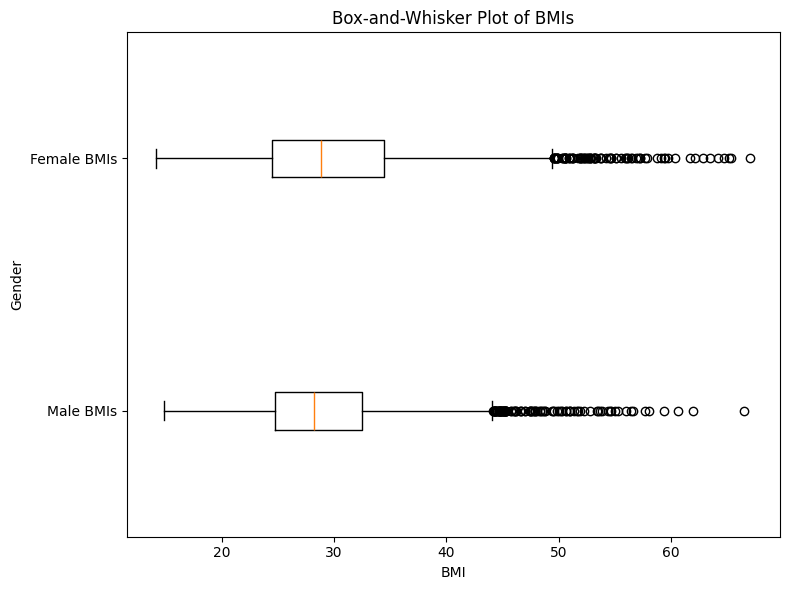

In [120]:

#* Extract male and female BMI data
male_bmis = male[:, -1]
female_bmis = female[:, -1]

fig, ax = plt.subplots(figsize=(8, 6))

#* Draw a box-and-whisker plot
box_data = [male_bmis, female_bmis]
ax.boxplot(box_data, labels=['Male BMIs', 'Female BMIs'], vert=False)

#* Set plot title and axis labels
ax.set_title('Box-and-Whisker Plot of BMIs')
ax.set_xlabel('BMI')
ax.set_ylabel('Gender')

plt.tight_layout()
plt.show()



In [121]:

#* Compute numerical aggregates
# *Mean
male_mean = np.mean(male_bmis)
female_mean = np.mean(female_bmis)

# *Median
male_median = np.median(male_bmis)
female_median = np.median(female_bmis)

# *Min
male_min = np.min(male_bmis)
female_min = np.min(female_bmis)

# *Max
male_max = np.max(male_bmis)
female_max = np.max(female_bmis)

# *Std
male_std = np.std(male_bmis)
female_std = np.std(female_bmis)

# *IQR
male_iqr = np.percentile(male_bmis, 75) - np.percentile(male_bmis, 25)
female_iqr = np.percentile(female_bmis, 75) - np.percentile(female_bmis, 25)

# *skewness
male_skew = skew(male_bmis)
female_skew = skew(female_bmis)

#* Print the results
print("## \t\t Female  Male")
print("## BMI mean \t {:.2f} \t {:.2f}".format(female_mean, male_mean))
print("## \t median  {:.2f} \t {:.2f}".format(female_median, male_median))
print("## \t min \t {:.2f} \t {:.2f}".format(female_min, male_min))
print("## \t max \t {:.2f} \t {:.2f}".format(female_max, male_max))
print("## \t std \t {:.2f} \t {:.2f}".format(female_std, male_std))
print("## \t iqr \t {:.2f} \t {:.2f}".format(female_iqr, male_iqr))
print("## \t skew \t {:.2f} \t {:.2f}".format(female_skew, male_skew))

## 		 Female  Male
## BMI mean 	 30.10 	 29.14
## 	 median  28.89 	 28.27
## 	 min 	 14.20 	 14.91
## 	 max 	 67.04 	 66.50
## 	 std 	 7.76 	 6.31
## 	 iqr 	 10.01 	 7.73
## 	 skew 	 0.92 	 0.97



1. Distribution Shape: Both distributions are right-skewed, indicating a tail of higher BMI values. The skewness is slightly more pronounced in males.

2. Central Tendency and Dispersion: While the central tendencies are similar, the female BMI distribution shows greater dispersion, suggesting a wider variation in BMI among females.

3. Outliers: The presence of more extreme outliers in the female population could indicate that higher BMI values are more prevalent among females than males.

Draw a scatterplot matrix (pairplot) for the male heights, weights, waist circumferences, hip circumferences, and BMIs (these five columns only); see the pairplot function in section 7.4.3 of our book. Example output (yours can be more aesthetic):


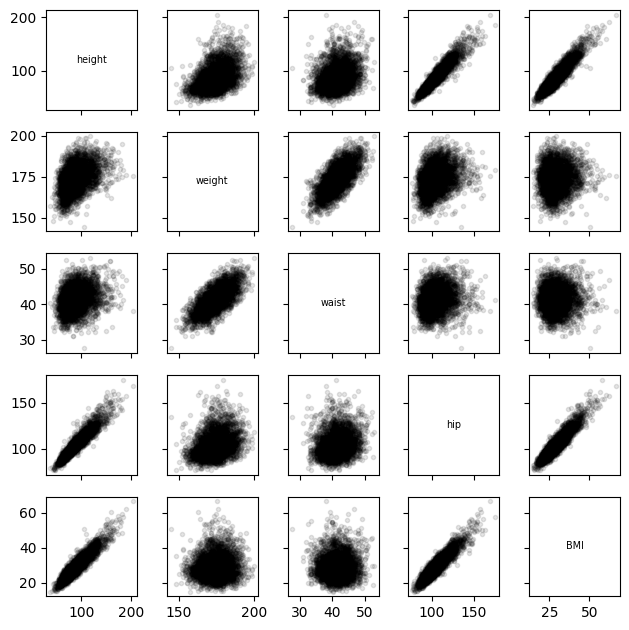

In [122]:
def pairplot(X, labels, bins=21, alpha=0.1):
    """
    Draws a scatter plot matrix, given:
    * X - data matrix,
    * labels - list of column names
    """
    assert X.shape[1] == len(labels)

    k = X.shape[1]
    fig, axes = plt.subplots(nrows=k, ncols=k, sharex="col", sharey="row",
        figsize=(plt.rcParams["figure.figsize"][0], )*2)
    for i in range(k):
        for j in range(k):
            ax = axes[i, j]
            if i == j:  # diagonal
                ax.text(0.5, 0.5, labels[i], transform=ax.transAxes,
                    ha="center", va="center", size="x-small")
            else:
                ax.plot(X[:, j], X[:, i], ".", color="black", alpha=alpha)
      
# *Extract the required columns from the male data
columns = ['height', 'weight', 'waist', 'hip', 'BMI']
data = male[:, [0, 1, 3, 5, -1]]

# *Create a scatterplot matrix (pairplot)
pairplot(data, columns)

# *Display the plot
plt.tight_layout()
plt.show()




Compute Pearson’s and Spearman’s correlation coefficients for all pairs of variables mentioned in subtask Q8. Present/visualise these coefficients on two correlation heatmaps (with correlation coefficients printed inside the coloured cells) see the corrheatmap functioninSection 9.1.2 of our book

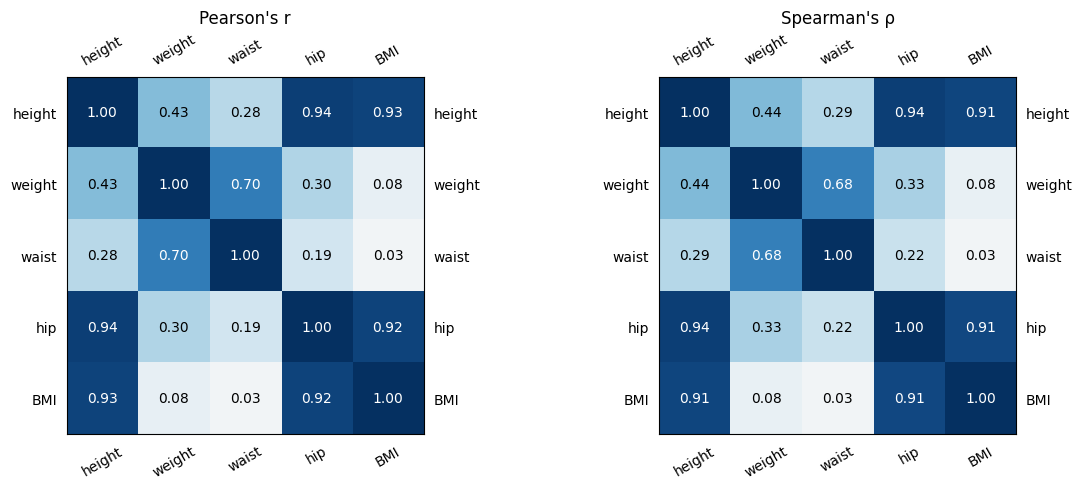

In [123]:
def corrheatmap(R, labels):
    """
    Draws a correlation heat map, given:
    * R - matrix of correlation coefficients for all variable pairs,
    * labels - list of column names
    """
    assert R.shape[0] == R.shape[1] and R.shape[0] == len(labels)
    k = R.shape[0]

    # plot the heat map using a custom colour palette
    # (correlations are in [-1, 1])
    plt.imshow(R, cmap=plt.colormaps.get_cmap("RdBu"), vmin=-1, vmax=1)

    # add text labels
    for i in range(k):
        for j in range(k):
            plt.text(i, j, f"{R[i, j]:.2f}", ha="center", va="center",
                color="black" if np.abs(R[i, j])<0.5 else "white")

    plt.xticks(np.arange(k), labels=labels, rotation=30)
    plt.tick_params(axis="x", which="both",
        labelbottom=True, labeltop=True, bottom=False, top=False)

    plt.yticks(np.arange(k), labels=labels)
    plt.tick_params(axis="y", which="both",
        labelleft=True, labelright=True, left=False, right=False)

    plt.grid(False)

#* Compute the Pearson and Spearman correlation
def compute_correlations(data):
    k = data.shape[1]
    pearson_corr = np.zeros((k, k))
    spearman_corr = np.zeros((k, k))
    
    for i in range(k):
        for j in range(k):
            if i <= j:
                pearson_corr[i, j], _ = pearsonr(data[:, i], data[:, j])
                spearman_corr[i, j], _ = spearmanr(data[:, i], data[:, j])
                pearson_corr[j, i] = pearson_corr[i, j]  # symmetric
                spearman_corr[j, i] = spearman_corr[i, j]  # symmetric
    
    return pearson_corr, spearman_corr

#* get the correlation matrices
pearson_corr, spearman_corr = compute_correlations(data)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # Set the figure size as needed

# *Pearson Correlation Heatmap
plt.sca(ax1)
corrheatmap(pearson_corr, columns)
ax1.set_title('Pearson\'s r')

# *Spearman Correlation Heatmap
plt.sca(ax2)  
corrheatmap(spearman_corr, columns)
ax2.set_title('Spearman\'s ρ')

plt.tight_layout()  
plt.show()





The scatter plot showed very strong linear relationship between "hip"&"height" (0.94 on heatmap), "height"&"BMI" (0.93 & 0.91 on heatmap) => strong possition relationship => taller individuals with larger hip circumferences tend to have higher BMIs. This could be due to a greater body frame supported by both height and hip circumference

Besides, "weight"&"waist" (0,7 & 0.68 on heatmap) These are moderately correlated, indicating variability in how body weight is distributed across individuals. Some may carry more weight around the waist than others

Create a new matrix zmale being a version of the male dataset with each of its eight columns standardised (by computing the z-scores of each column).


In [124]:

#* Calculate the z-scores for each column in the male dataset
zmale = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

print("Standardized male data matrix (zmale):\n", zmale)

Standardized male data matrix (zmale):
 [[ 0.48720705  1.10591976 -0.38613936  0.30342312  0.09285103]
 [-0.65664058  1.35391391 -0.10615688 -0.81857635 -1.14778251]
 [ 0.71597658  1.49748947  0.82711806  0.27066401  0.16766517]
 ...
 [ 0.95408363 -0.66919624  1.32486469  1.10602127  1.43952184]
 [-0.41386476  0.33583267  0.20493477 -0.38451816 -0.56944462]
 [-1.33828039 -0.82582412 -0.07504772 -1.14616744 -1.24593988]]


Perform the aforementioned on zmale instead of on the original male dataset(do
not include two pairplots nor four heatmaps)

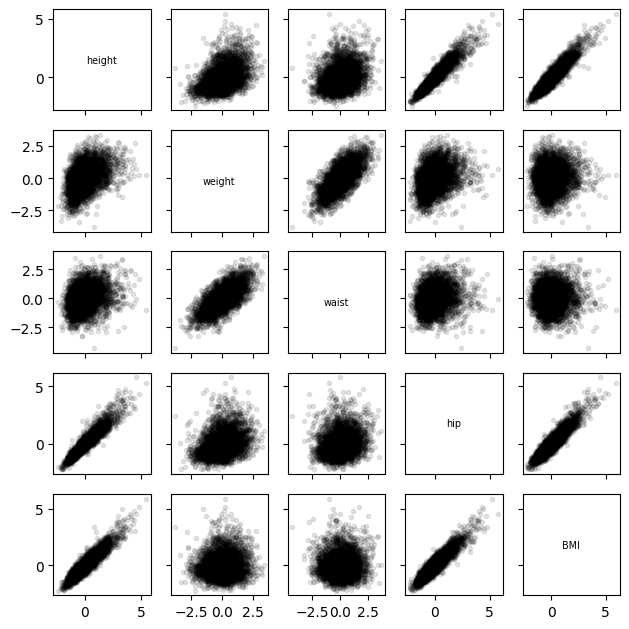

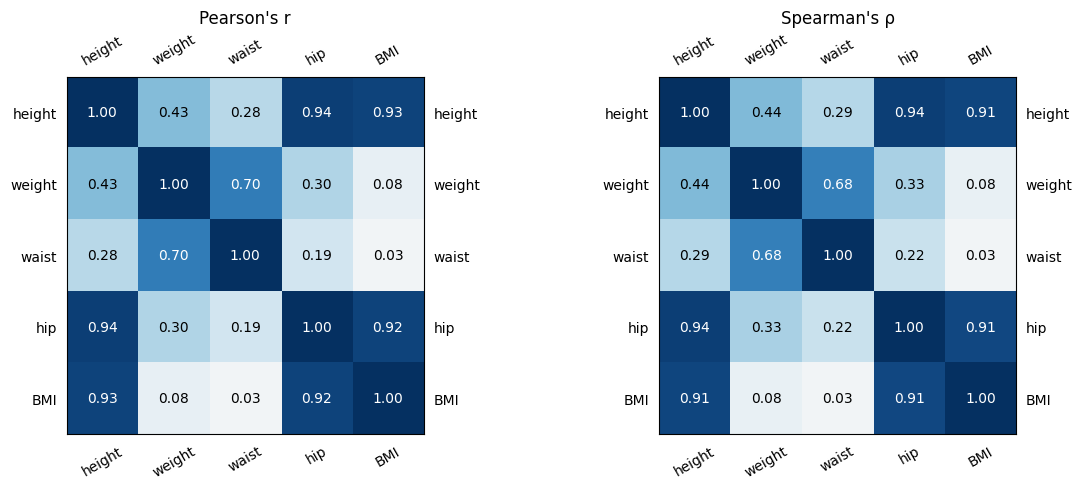

In [125]:

#* remake question 8 and 9 with zmale
#* Question 8
pairplot(zmale, columns)

# Display the plot
plt.tight_layout()
plt.show()

#* Question 9
pearson_corr, spearman_corr = compute_correlations(zmale)

# Use the corrheatmap function to plot heatmaps side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # Set the figure size as needed

# Pearson Correlation Heatmap
plt.sca(ax1)  # Set the current axes to ax1
corrheatmap(pearson_corr, columns)
ax1.set_title('Pearson\'s r')

# Spearman Correlation Heatmap
plt.sca(ax2)  # Set the current axes to ax2
corrheatmap(spearman_corr, columns)
ax2.set_title('Spearman\'s ρ')

plt.tight_layout()  # Adjust the layout to make sure everything fits without overlap
plt.show()


#* Question 10
#* After Standardized data: the relationship variables are more clear and easy to interpret 
#* because the data is now on the same scale.
